In [29]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
with open('benchmark_results_old.pkl', 'rb') as f:
    old_results = pickle.load(f)
    
with open('benchmark_results.pkl', 'rb') as f:
    new_results = pickle.load(f)

In [32]:
# Each dictionary contains the names of the benchmark as keys, and then a list of 10 results as the values.
# Convert to long form dataframe
old_df = pd.DataFrame.from_dict(old_results, orient='index').stack().reset_index()
old_df.columns = ['benchmark', 'run', 'time']
old_df['version'] = 'old'

new_df = pd.DataFrame.from_dict(new_results, orient='index').stack().reset_index()
new_df.columns = ['benchmark', 'run', 'time']
new_df['version'] = 'new'

df = pd.concat([old_df, new_df])
df

,benchmark,run,time,version
0,single_check_empty,0,0.001072,old
1,single_check_empty,1,0.001081,old
2,single_check_empty,2,0.001082,old
3,single_check_empty,3,0.001065,old
4,single_check_empty,4,0.001071,old
...,...,...,...,...
170,multi_iterate_agents,20,0.144819,new
171,multi_iterate_agents,21,0.143805,new
172,multi_iterate_agents,22,0.145009,new
173,multi_iterate_agents,23,0.144366,new


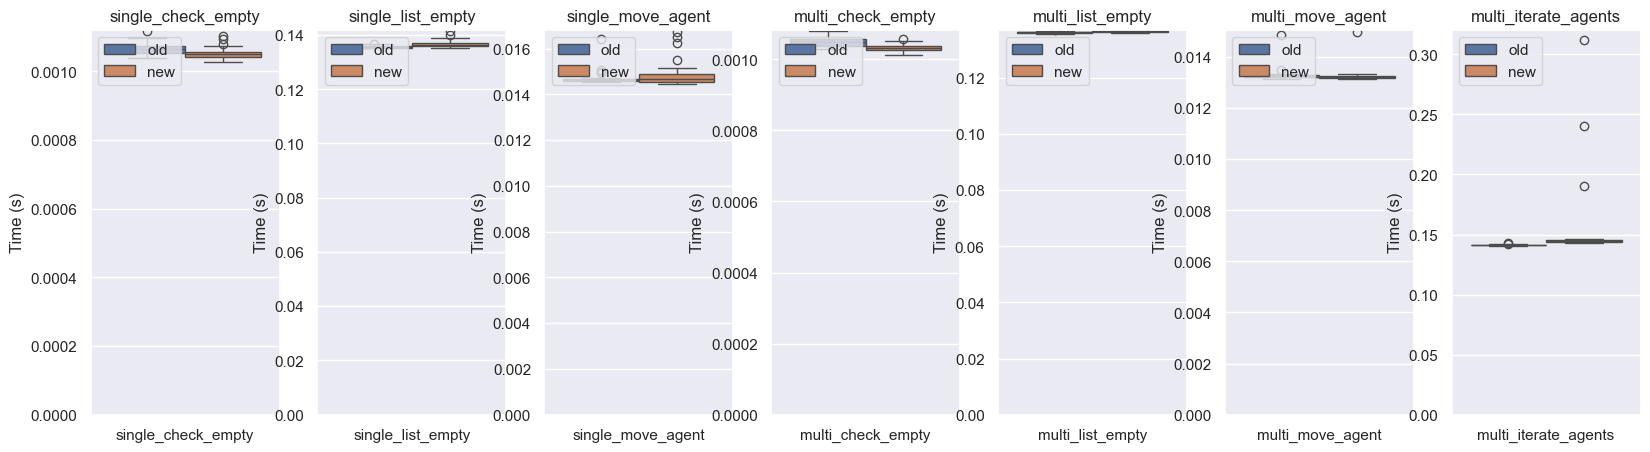

In [33]:
# Create seaborn boxplot for each of the 7 benchmarks
fig, ax = plt.subplots(1, 7, figsize=(20, 5))
for i, benchmark in enumerate(df['benchmark'].unique()):
    sns.boxplot(x='benchmark', y='time', hue='version', data=df[df['benchmark'] == benchmark], ax=ax[i])
    ax[i].set_title(benchmark)
    ax[i].set_xlabel('')
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylabel('Time (s)')
    ax[i].legend(loc='upper left')


In [34]:
# Save figure
fig.savefig('benchmark_results.svg', bbox_inches='tight')